# <center>L2 Computational Physics</center>
---

## Random Walks

This assignment will look at some properties of random walks.

In [56]:
import numpy
from matplotlib import pyplot as plt 

To do our work we will implement a walker class. When initialised a list of possible steps is populated. In one dimension it is

[+s] , [-s] 

where s is the step size, it defaults to 1 but can be set as an argument in the constructor. In two dimensions the steps list contains

[ +s , 0 ] , [ -s , 0 ] ,  [ 0 , +s ] , [ 0 , -s ]

At each step the current position of the walker, saved in `self.pos`, is updated by adding one of the possible steps. The function `pickStep` chooses randomly one of the possible steps. Use this function to implement the `doSteps` function that performs `n` steps and returns a `(n+1) x ndim` array representing the trajectory of the walker, including the starting point. 

In [57]:

class walker:
    def __init__(self,x0,ndim=1, step_size=1.0):
        self.pos=x0
        self.ndim=ndim
        self.possibleSteps=[]
        for i in range(ndim):
            step=numpy.zeros(ndim)
            step[i]= - step_size
            self.possibleSteps.append(numpy.array(step,dtype='f'))
            step[i]= + step_size
            self.possibleSteps.append(step.copy())
        self.npossible=len(self.possibleSteps)
        
  
    def pickStep(self):
        istep = numpy.random.choice(range(self.npossible))
        return self.possibleSteps[istep]
    
    def doSteps(self,n):
        positions=numpy.ndarray((n+1,self.ndim),dtype='f')
        positions[0] = 0
        for i in range(n):
            positions[i+1] = positions[i] + self.pickStep()
        return positions

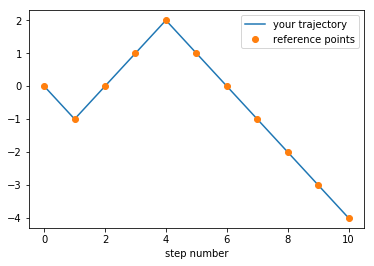

In [58]:
# this test is worth 2 marks
numpy.random.seed(1111)
w = walker(numpy.zeros(1))
pos_test = w.doSteps(10)
reference = [[ 0.], [-1.], [ 0.], [ 1.], [ 2.], [ 1.], [ 0.], [-1.], [-2.], [-3.], [-4.]]
assert len(pos_test)==11
# plots to help debugging
plt.plot(range(11),pos_test, label='your trajectory')
plt.plot(range(11),reference,'o', label='reference points')
plt.legend()
plt.xlabel('step number')
assert (pos_test == reference).all()

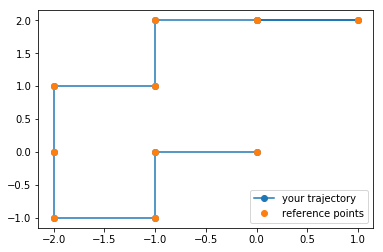

In [59]:
# this test is worth 5 marks
numpy.random.seed(1112)
w = walker(numpy.zeros(2), ndim=2)
pos_test = w.doSteps(10)
reference = numpy.array([[ 0.,  0.], [-1.,  0.], [-1., -1.], [-2., -1.], 
             [-2.,  0.], [-2.,  1.], [-1.,  1.], [-1.,  2.], 
             [ 0.,  2.], [ 1.,  2.], [ 0.,  2.]])
assert pos_test.shape == (11,2)
# plots to help debugging
plt.plot(pos_test[:,0], pos_test[:,1],'-o', label='your trajectory')
plt.plot(reference[:,0],reference[:,1],'o', label='reference points')
plt.legend()
assert (pos_test == reference).all()

This is a plot to visualise trajectories. Use it to convince yourself that you get different trajectories.

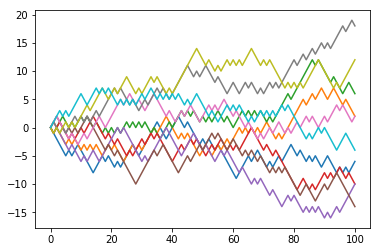

In [60]:
nsteps = 100
for i in range(10):
    w = walker(numpy.zeros(1))
    ys = w.doSteps(nsteps)
    plt.plot(range(nsteps+1),ys)

**Task 1**

Make a plot of average position and average squared position of 100 1D walkers using 1000 steps. Your plot needs a legend, title and labels. [5 marks]


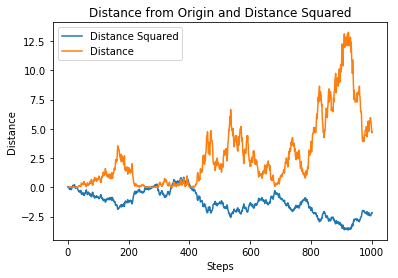

In [61]:
nnsteps = 1000
nndim = 1
nnwalkers = 100

steps = numpy.linspace(0,nnsteps+1,num = nnsteps+1)


def iterative(nsteps,nwalkers,ndim):
    
    iteration = numpy.empty((2,nwalkers,ndim), dtype='f')
    iteration[0] = 0
    averages = []
    averagesq = []

    
    for i in range(nsteps+1):
        w = walker(numpy.zeros(1))
        randomstep = []
        for k in range(nwalkers):
            randomstep.append(w.pickStep())
            

        if i%2 == 0:
            iteration[1]= iteration[0] + randomstep
            x = numpy.sum(iteration[1], axis = 0)/nwalkers
            averages.append(x)

        else:
            iteration[0] = iteration[1] + randomstep
            y = numpy.sum(iteration[0], axis = 0)/nwalkers
            averages.append(y)

    averagesq = numpy.zeros(len(averages))
    for i in range(len(averages)):
        averagesq[i] = numpy.sum(averages[i]**2, axis = 0)
            
    
    return averages, averagesq

av, avsq = iterative(nnsteps,nnwalkers,nndim)

plt.figure()
plt.xlabel('Steps')
plt.ylabel('Distance')
plt.title('Distance from Origin and Distance Squared')
plt.plot(steps,av, label = 'Distance Squared')        
plt.plot(steps,avsq, label ='Distance')
plt.legend()
    
    

**Task 2**

Make a plot to show that the average squared distance scaling is independent of the dimension in which the walker moves. Use 100 steps and 400 walkers and use $D=1,2,3,4$. The plot should have a title, legend and labels. [5 marks]


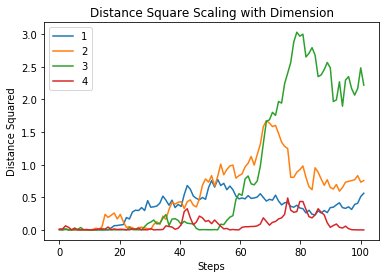

In [62]:
n2steps = 100
n2walkers = 400
dimensions = range(1,5)

plt.figure()

steps = numpy.linspace(0,101,num=101)

for ndim in dimensions:
    y1, y2 = iterative(n2steps,n2walkers,ndim)
    plt.plot(steps, y2, label = ndim)

plt.title('Distance Square Scaling with Dimension')
plt.xlabel('Steps')
plt.ylabel('Distance Squared')
plt.legend()




## 2D walkers

Use 1000 walkers randomly distributed in the unit square (the positions are given in the array `rand_pos`) simulate the diffusion of particles with step size 0.05. Make a plot of the position of the walkers after 10, 100 and 500 steps. The plots should have labels and titles.

Tip: Use `plt.scatter` and consider using its `alpha` option to make you plot look nicer. [6 marks]


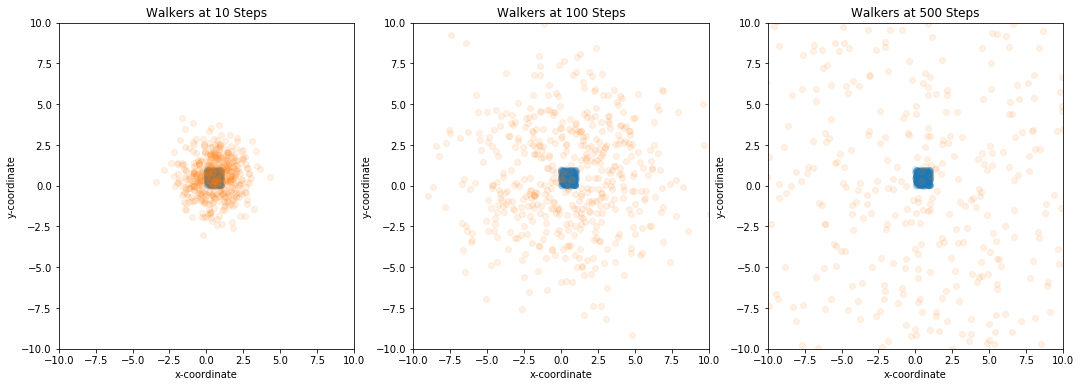

In [69]:
n3dim=2
n3walkers=500
n3steps = 10,100,500

stepsdif = numpy.array([[0.5,0],[-0.5,0],[0,0.5],[0,-0.5]])

rand_pos = numpy.random.uniform(size=(n3walkers, n3dim))

# this code is a template to create 3 subplots in one, adapt it to your task!
plt.figure(figsize=(18,6))
for j, nsteps in enumerate([10,100,500]):
    iteration = rand_pos
    for i in range(nsteps+1):
        w = walker(numpy.zeros(1))
        randomstep = []
        for k in range(n3walkers):
            randomstep.append(stepsdif[numpy.random.choice(range(len(stepsdif)))])
        
        
        iteration = iteration + randomstep    
       
    plt.subplot(131+j)
    plt.xlim((-10, 10))
    plt.ylim((-10, 10))
    plt.title("Walkers at {} Steps".format(nsteps))
    plt.xlabel('x-coordinate')
    plt.ylabel('y-coordinate')
    plt.scatter(rand_pos[:,0], rand_pos[:,1], alpha=0.1)
    plt.scatter(iteration[:,0],iteration[:,1], alpha = 0.1)